<a href="https://colab.research.google.com/github/pipet0/pipet0/blob/main/Videojuegos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/drive/MyDrive/Intro_Ciencia_de_Datos')

Mounted at /content/gdrive


In [ ]:
!pip install Unidecode
!pip install openpyxl
!pip install --upgrade xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from unidecode import unidecode

In [ ]:
file_path = '/content/gdrive/MyDrive/Intro_Ciencia_de_Datos/datos.xlsx'

df = pd.read_excel(file_path)

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.columns = df.columns.str.replace('_', '')
df.columns = df.columns.str.lower()
all_dfs=df
df.columns

Index(['name', 'platform', 'yearofrelease', 'genre', 'publisher', 'nasales',
       'eusales', 'jpsales', 'othersales', 'globalsales', 'criticscore',
       'criticcount', 'userscore', 'usercount', 'developer', 'rating'],
      dtype='object')

In [ ]:
renaming = {
    'yearofrelease': 'year_of_release',
    'nasales': 'na_sales',
    'eusales': 'eu_sales',
    'othersales': 'other_sales',
    'globalsales': 'global_sales',
    'criticscore': 'critic_score',
    'criticcount': 'critic_count',
    'userscore': 'user_score',
    'usercount': 'user_count',
    'jpsales': 'jp_sales'
}

df.rename(columns=renaming, inplace=True)

df.columns = df.columns.str.lower()
columns_to_drop = ['user_count', 'critic_count']

# Now df has all column names in lowercase
print(df.columns)

# Check for null values in the modified DataFrame df
print(df.isnull().sum())


Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')
name                  2
platform              0
year_of_release     269
genre                 2
publisher            54
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8582
critic_count       8582
user_score         6704
user_count         9129
developer          6623
rating             6769
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
# mpl.rcParams.keys()
sns.set_palette('CMRmap')

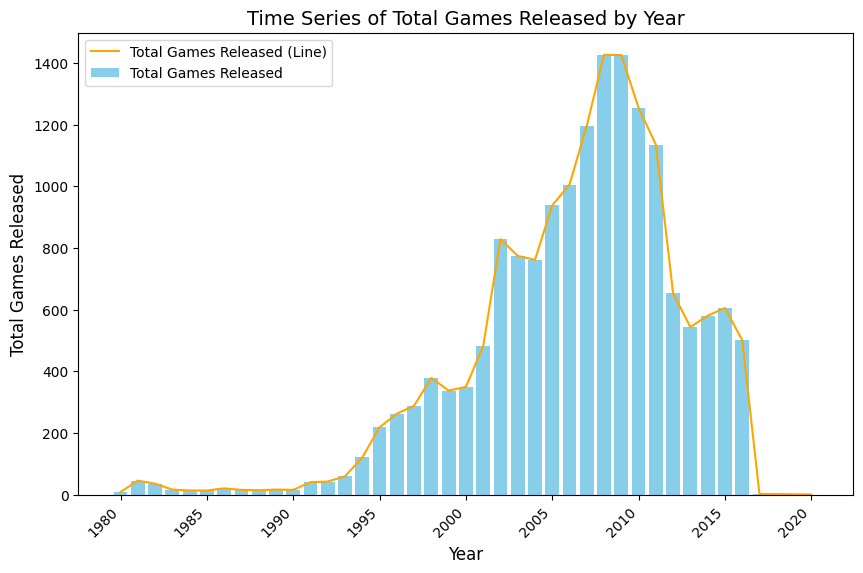

In [ ]:

# Aggregate the data to count the number of games released in each year
games_per_year = df.groupby('year_of_release')['name'].count().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bars
plt.bar(games_per_year['year_of_release'], games_per_year['name'], color='skyblue', label='Total Games Released')

# Create the line plot
sns.lineplot(data=games_per_year, x='year_of_release', y='name', color='orange', label='Total Games Released (Line)')

# Set title and axis labels with smaller font size
plt.title('Time Series of Total Games Released by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Games Released', fontsize=12)

# Rotate x-axis labels for better visibility and set smaller font size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add legend
plt.legend()

# Show the plot
plt.show()


(array([1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.,
        2020.]),
 [Text(1975.0, 0, '1975'),
  Text(1980.0, 0, '1980'),
  Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020')])

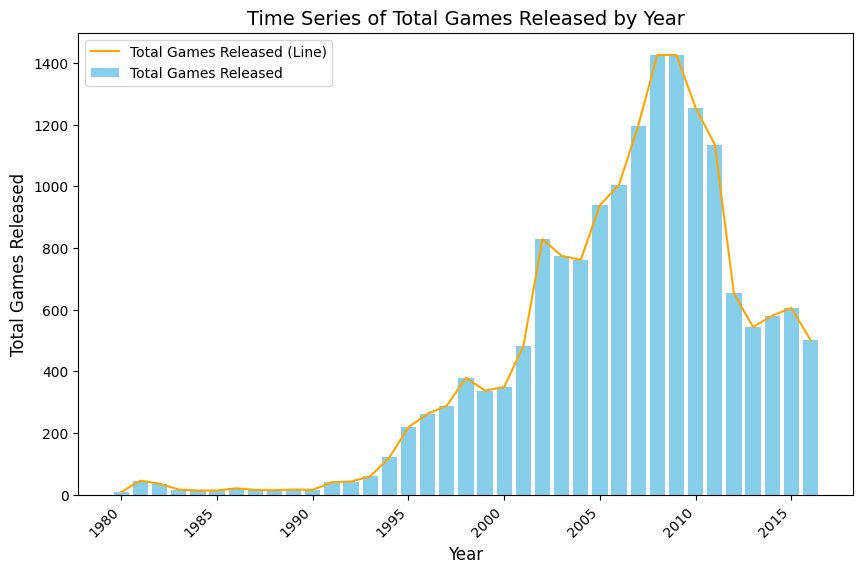

In [ ]:
excluded_years = [2017, 2018, 2019, 2020]  # Example: Exclude years 2000 and 2005

games_per_year_filtered = games_per_year[~games_per_year['year_of_release'].isin(excluded_years)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bars
plt.bar(games_per_year_filtered['year_of_release'], games_per_year_filtered['name'], color='skyblue', label='Total Games Released')

# Create the line plot
sns.lineplot(data=games_per_year_filtered, x='year_of_release', y='name', color='orange', label='Total Games Released (Line)')

# Set title and axis labels with smaller font size
plt.title('Time Series of Total Games Released by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Games Released', fontsize=12)

# Rotate x-axis labels for better visibility and set smaller font size
plt.xticks(rotation=45, ha='right', fontsize=10)

In [ ]:
# Get the value counts of the 'year of release' column
year_counts = df['year_of_release'].value_counts().sort_index().reset_index()

# Rename the columns in the new DataFrame
year_counts.columns = ['Year', 'Count']

# Display the new DataFrame
print(year_counts)

      Year  Count
0   1980.0      9
1   1981.0     46
2   1982.0     36
3   1983.0     17
4   1984.0     14
5   1985.0     14
6   1986.0     21
7   1987.0     16
8   1988.0     15
9   1989.0     17
10  1990.0     16
11  1991.0     41
12  1992.0     43
13  1993.0     62
14  1994.0    121
15  1995.0    219
16  1996.0    263
17  1997.0    289
18  1998.0    379
19  1999.0    338
20  2000.0    350
21  2001.0    482
22  2002.0    829
23  2003.0    775
24  2004.0    762
25  2005.0    939
26  2006.0   1006
27  2007.0   1197
28  2008.0   1427
29  2009.0   1426
30  2010.0   1255
31  2011.0   1136
32  2012.0    653
33  2013.0    544
34  2014.0    581
35  2015.0    606
36  2016.0    502
37  2017.0      3
38  2020.0      1


        Global_Sales  Count
Year                       
1980.0         11.38      9
1981.0         35.77     46
1982.0         28.86     36
1983.0         16.79     17
1984.0         50.36     14
1985.0         53.94     14
1986.0         37.07     21
1987.0         21.74     16
1988.0         47.22     15
1989.0         73.45     17
1990.0         49.39     16
1991.0         32.23     41
1992.0         76.17     43
1993.0         48.40     62
1994.0         79.18    121
1995.0         88.11    219
1996.0        199.15    263
1997.0        200.98    289
1998.0        256.45    379
1999.0        251.25    338
2000.0        201.58    350
2001.0        331.47    482
2002.0        395.51    829
2003.0        357.80    775
2004.0        419.05    762
2005.0        458.31    939
2006.0        518.22   1006
2007.0        605.37   1197
2008.0        671.79   1427
2009.0        658.88   1426
2010.0        590.59   1255
2011.0        507.79   1136
2012.0        355.84    653
2013.0        361.24

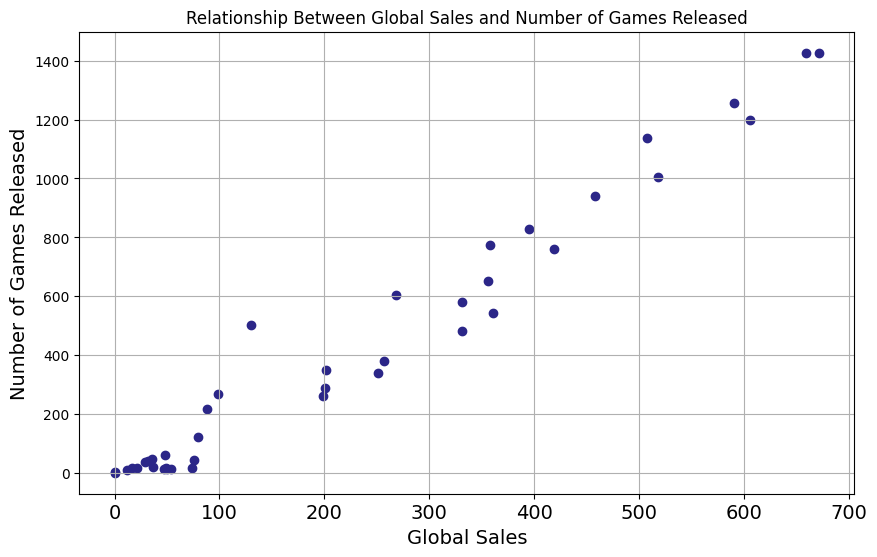

In [ ]:
# Aggregate global sales by year
sales_by_year = df.groupby('year_of_release')['global_sales'].sum().reset_index()

# Rename columns for clarity
sales_by_year.columns = ['Year', 'Global_Sales']

# Set the 'Year' column as index
sales_by_year.set_index('Year', inplace=True)
year_counts.set_index('Year', inplace=True)

# Concatenate the two DataFrames along the columns axis
merged_df = pd.concat([sales_by_year, year_counts], axis=1)

print(merged_df)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Global_Sales'], merged_df['Count'])

# Adding labels and title
plt.xlabel('Global Sales')
plt.ylabel('Number of Games Released')
plt.title('Relationship Between Global Sales and Number of Games Released')

# Adding grid for better readability
plt.grid(True)

# Show plot
plt.show()


      Year  Global_Sales_Per_Year
0   1980.0                  11.38
1   1981.0                  35.77
2   1982.0                  28.86
3   1983.0                  16.79
4   1984.0                  50.36
5   1985.0                  53.94
6   1986.0                  37.07
7   1987.0                  21.74
8   1988.0                  47.22
9   1989.0                  73.45
10  1990.0                  49.39
11  1991.0                  32.23
12  1992.0                  76.17
13  1993.0                  48.40
14  1994.0                  79.18
15  1995.0                  88.11
16  1996.0                 199.15
17  1997.0                 200.98
18  1998.0                 256.45
19  1999.0                 251.25
20  2000.0                 201.58
21  2001.0                 331.47
22  2002.0                 395.51
23  2003.0                 357.80
24  2004.0                 419.05
25  2005.0                 458.31
26  2006.0                 518.22
27  2007.0                 605.37
28  2008.0    

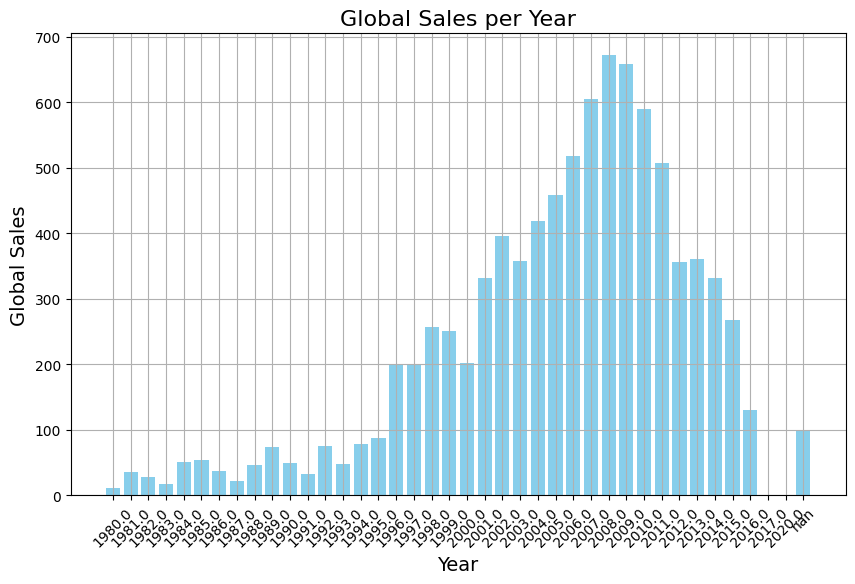

In [ ]:
# Group by 'year of release' and sum the 'global sales' for each group
sales_per_year = df.groupby('year_of_release')['global_sales'].sum().reset_index()

# Rename columns for clarity
sales_per_year.columns = ['Year', 'Global_Sales_Per_Year']

print(sales_per_year)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_per_year['Year'], sales_per_year['Global_Sales_Per_Year'], color='skyblue')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.title('Global Sales per Year', fontsize=16)

# Adding grid for better readability
plt.grid(True)

# Setting font size and rotation for x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Show plot
plt.show()



In [ ]:
# Group by 'year of release' and sum the 'global sales' for each group
sales_per_year = df.groupby('year_of_release')['global_sales'].sum().reset_index()

# Rename columns for clarity
sales_per_year.columns = ['Year', 'Global_Sales_Per_Year']

print(sales_per_year)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_per_year['Year'], sales_per_year['Global_Sales_Per_Year'], color='skyblue')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales', fontsize=14)
plt.title('Global Sales per Year', fontsize=16)

# Adding grid for better readability
plt.grid(True)

# Setting font size and rotation for x-axis labels
plt.xticks(rotation=45, fontsize=10)

# Show plot
plt.show()

<ipython-input-21-f021145633cf>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_for_correlation.corr()


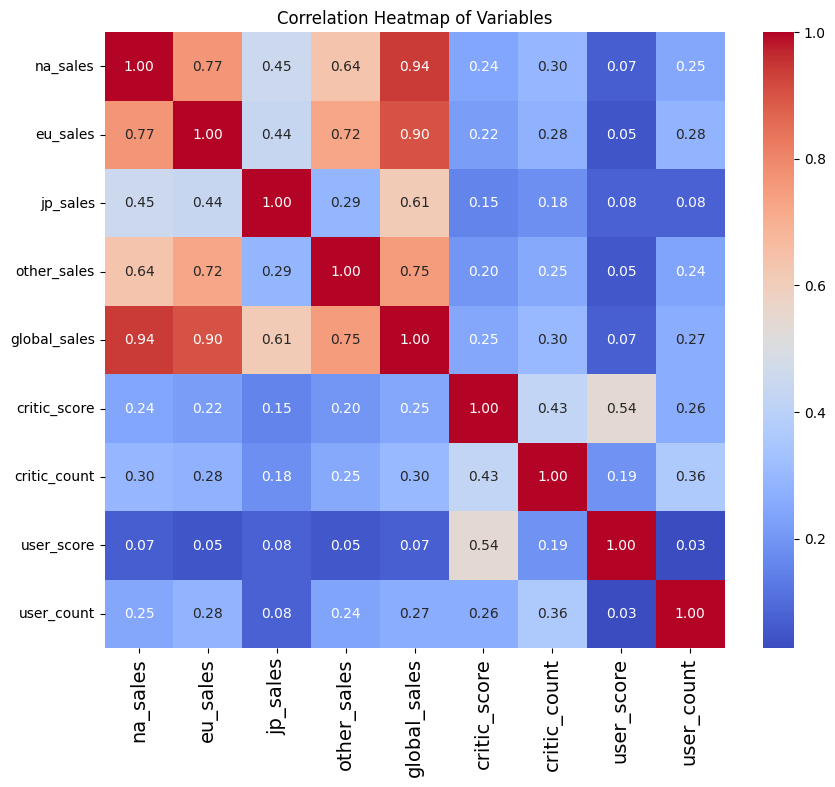

In [ ]:

# Drop 'year_of_release' column
df_for_correlation = df.drop(columns=['year_of_release'])

# Convert 'user_score' column to numeric, coerce errors to NaN
df_for_correlation['user_score'] = pd.to_numeric(df_for_correlation['user_score'], errors='coerce')

# Fill missing values in 'user_score' column with mean
df_for_correlation['user_score'].fillna(df_for_correlation['user_score'].mean(), inplace=True)

# Calculate the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()


In [ ]:
# Plotting the scatter plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critic_score', y='global_sales', color='purple', alpha=0.5)

# Adding labels and title
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Relationship Between Critic Score and Global Sales')

plt.yscale('log')
# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_500_games, x='critic_score', y='global_sales', color='purple')
sns.regplot(data=top_500_games, x='critic_score', y='global_sales', scatter=False, color='purple')

# Change the scale of the y-axis to logarithmic
plt.yscale('log')

# Adding labels and title
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title('Relationship Between Critic Score and Global Sales for Top 500 Games')

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Replace other non-numeric values (if any) with NaN
top_500_games['user_score'] = pd.to_numeric(top_500_games['user_score'], errors='coerce')

# Plotting the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_500_games, x='user_score', y='global_sales', color='purple')
sns.regplot(data=top_500_games, x='user_score', y='global_sales', scatter=False, color='blue')

# Change the scale of the y-axis to logarithmic
plt.yscale('log')

# Adding labels and title
plt.xlabel('User Score')
plt.ylabel('Global Sales')
plt.title('Relationship Between User Score and Global Sales for Top 500 Games')

# Show plot
plt.grid(True)
plt.show()

# GRÁFICOS POR ORDEN

## Nombre con Ventas: top 20 juegos con más ventas

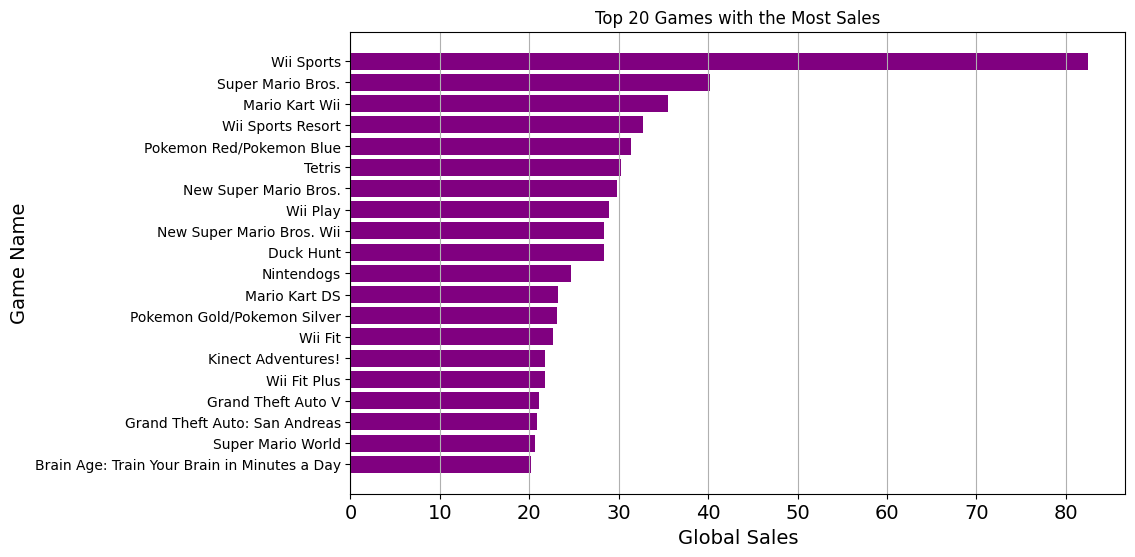

In [ ]:
top_20_games = df.nlargest(20, 'global_sales')

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_games['name'], top_20_games['global_sales'], color='purple')

# Adding labels and title
plt.xlabel('Global Sales')
plt.ylabel('Game Name')
plt.title('Top 20 Games with the Most Sales')

# Invert y-axis to display the highest sales at the top
plt.gca().invert_yaxis()

# Show plot
plt.grid(axis='x')
plt.show()

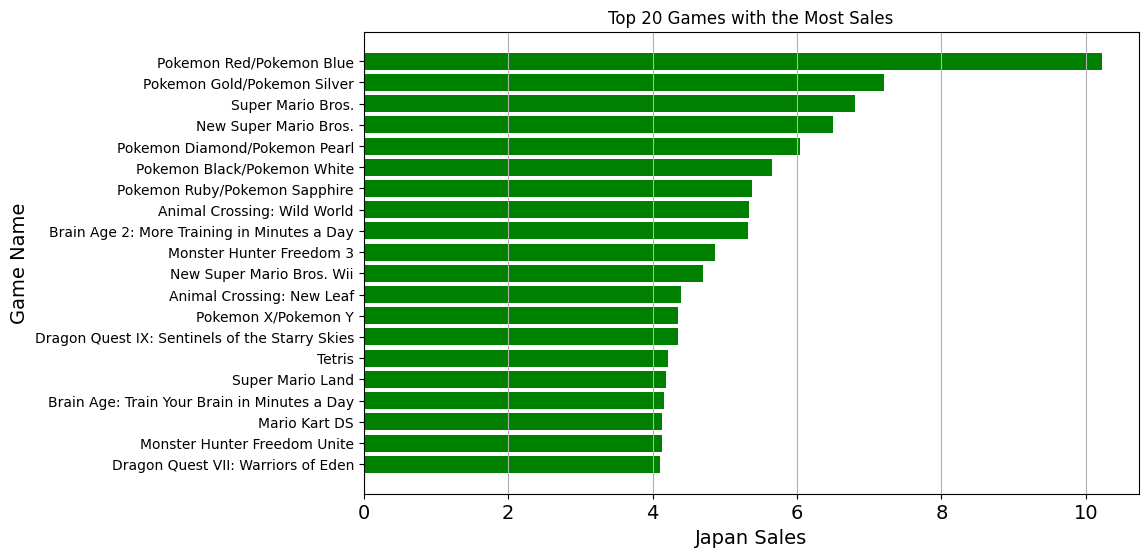

In [ ]:
top_20_gamesjp = df.nlargest(20, 'jp_sales')

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_gamesjp['name'], top_20_gamesjp['jp_sales'], color='green')

# Adding labels and title
plt.xlabel('Japan Sales')
plt.ylabel('Game Name')
plt.title('Top 20 Games with the Most Sales')

# Invert y-axis to display the highest sales at the top
plt.gca().invert_yaxis()

# Show plot
plt.grid(axis='x')
plt.show()

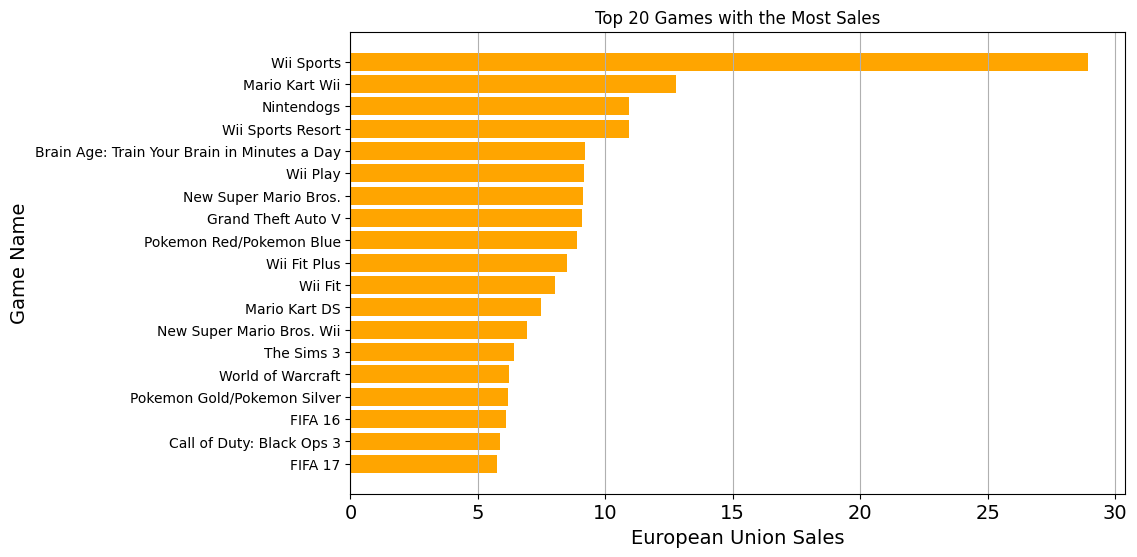

In [ ]:
top_20_gameseu = df.nlargest(20, 'eu_sales')

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_gameseu['name'], top_20_gameseu['eu_sales'], color='orange')

# Adding labels and title
plt.xlabel('European Union Sales')
plt.ylabel('Game Name')
plt.title('Top 20 Games with the Most Sales')

# Invert y-axis to display the highest sales at the top
plt.gca().invert_yaxis()

# Show plot
plt.grid(axis='x')
plt.show()

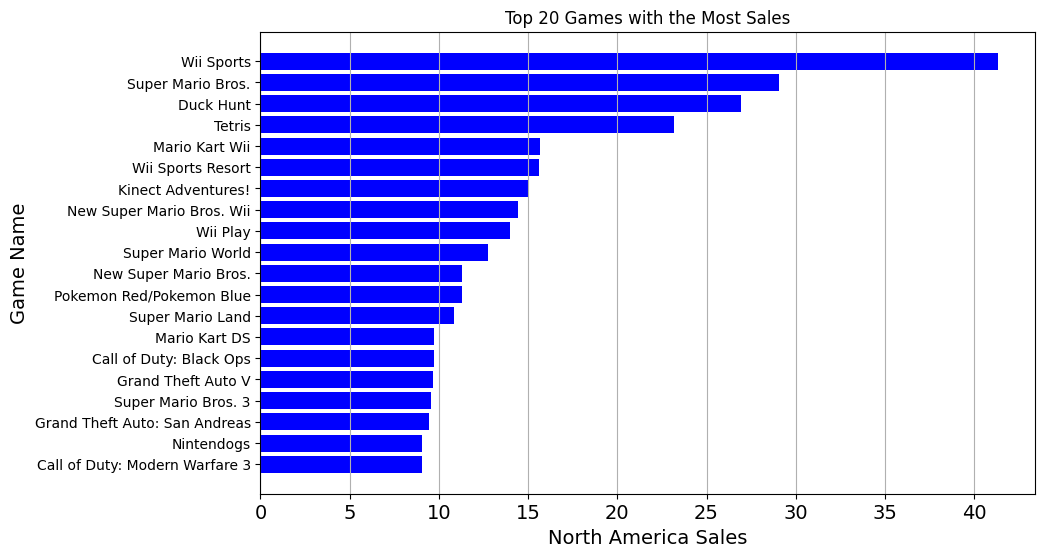

In [ ]:
top_20_gamesna = df.nlargest(20, 'na_sales')

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_gamesna['name'], top_20_gamesna['na_sales'], color='blue')

# Adding labels and title
plt.xlabel('North America Sales')
plt.ylabel('Game Name')
plt.title('Top 20 Games with the Most Sales')

# Invert y-axis to display the highest sales at the top
plt.gca().invert_yaxis()

# Show plot
plt.grid(axis='x')
plt.show()

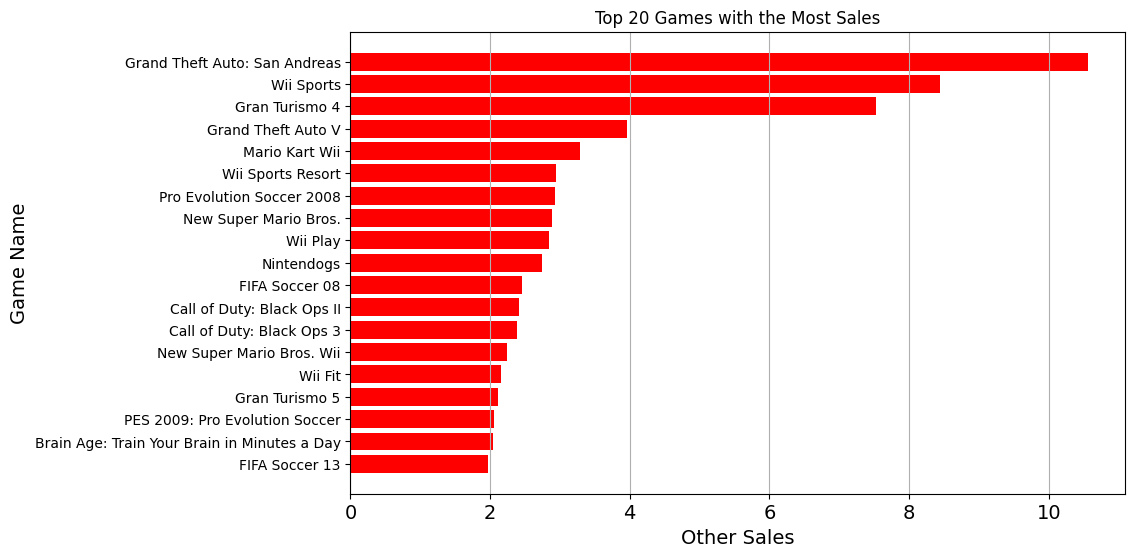

In [ ]:
top_20_gameso = df.nlargest(20, 'other_sales')

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_gameso['name'], top_20_gameso['other_sales'], color='red')

# Adding labels and title
plt.xlabel('Other Sales')
plt.ylabel('Game Name')
plt.title('Top 20 Games with the Most Sales')

# Invert y-axis to display the highest sales at the top
plt.gca().invert_yaxis()

# Show plot
plt.grid(axis='x')
plt.show()

## Publisher por Ventas

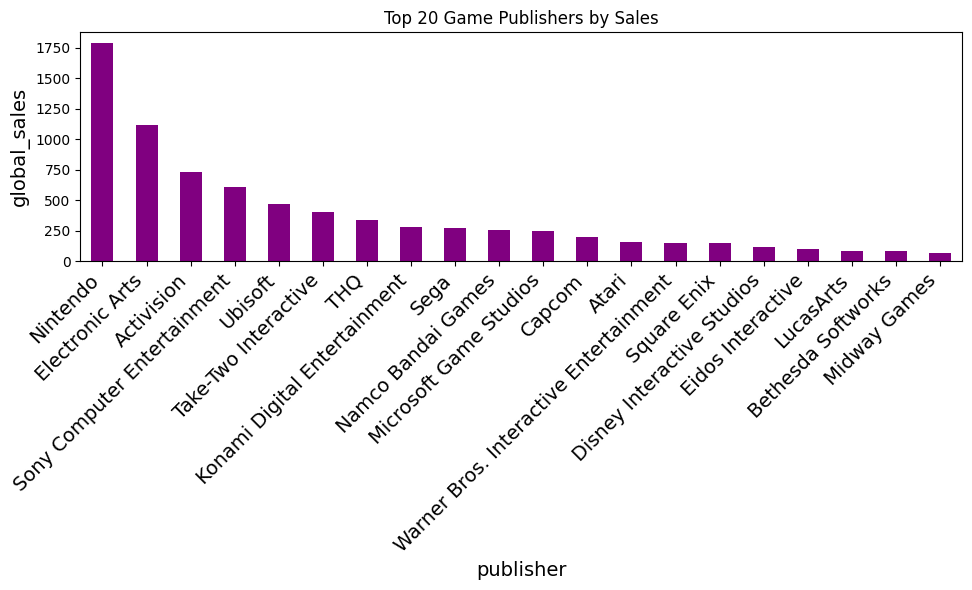

In [ ]:
# Group by Publisher and sum the sales
publisher_sales = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False)

# Select top 20 publishers with the most sales
top_publishers = publisher_sales.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='purple')
plt.title('Top 20 Game Publishers by Sales')
plt.xlabel('publisher')
plt.ylabel('global_sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

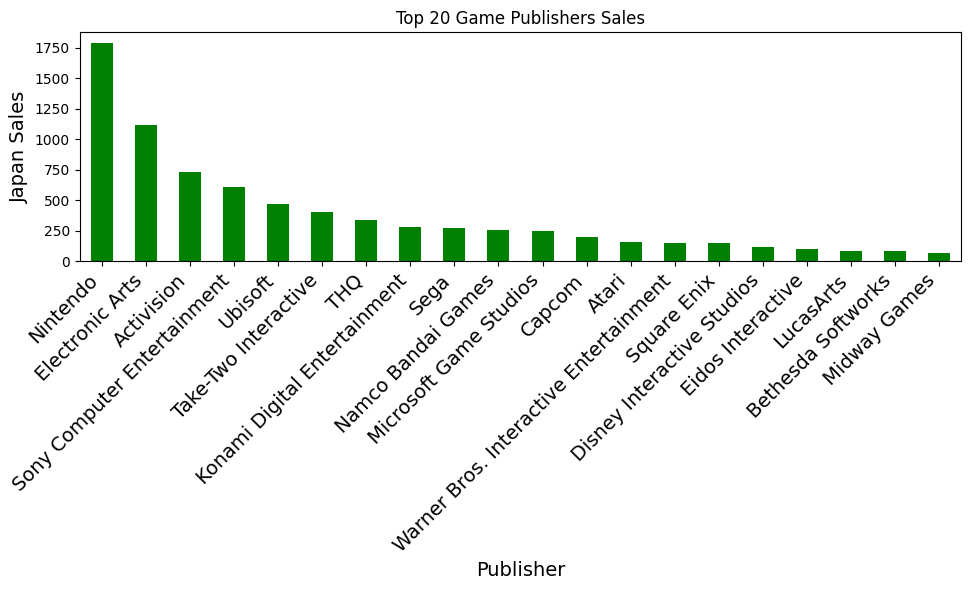

In [ ]:
# Group by Publisher and sum the sales
publisher_salesjp = df.groupby('publisher')['jp_sales'].sum().sort_values(ascending=False)

# Select top 20 publishers with the most sales
top_publishersjp = publisher_salesjp.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='green')
plt.title('Top 20 Game Publishers Sales')
plt.xlabel('Publisher')
plt.ylabel('Japan Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

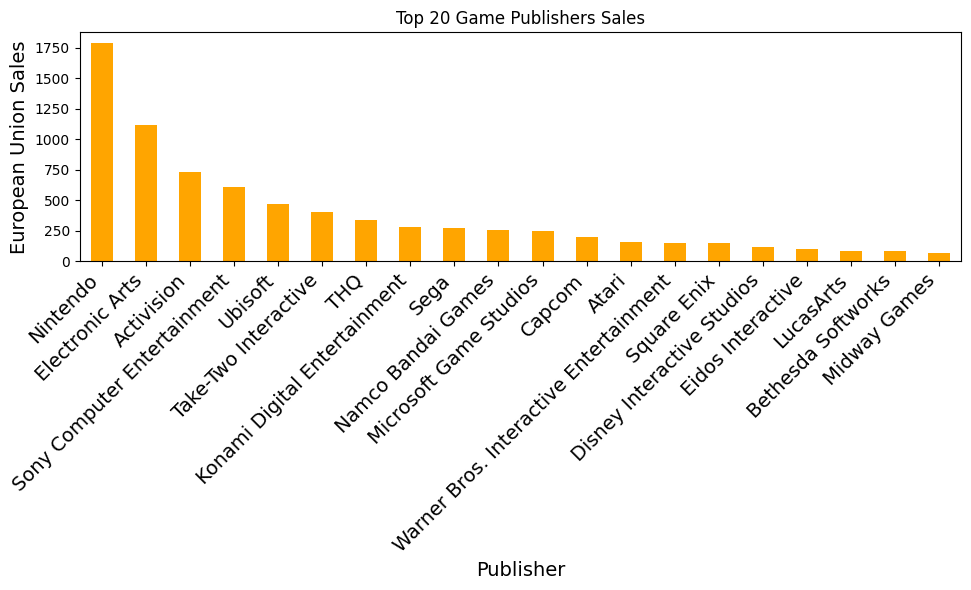

In [ ]:
# Group by Publisher and sum the sales
publisher_saleseu = df.groupby('publisher')['eu_sales'].sum().sort_values(ascending=False)

# Select top 20 publishers with the most sales
top_publisherseu = publisher_saleseu.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='orange')
plt.title('Top 20 Game Publishers Sales')
plt.xlabel('Publisher')
plt.ylabel('European Union Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

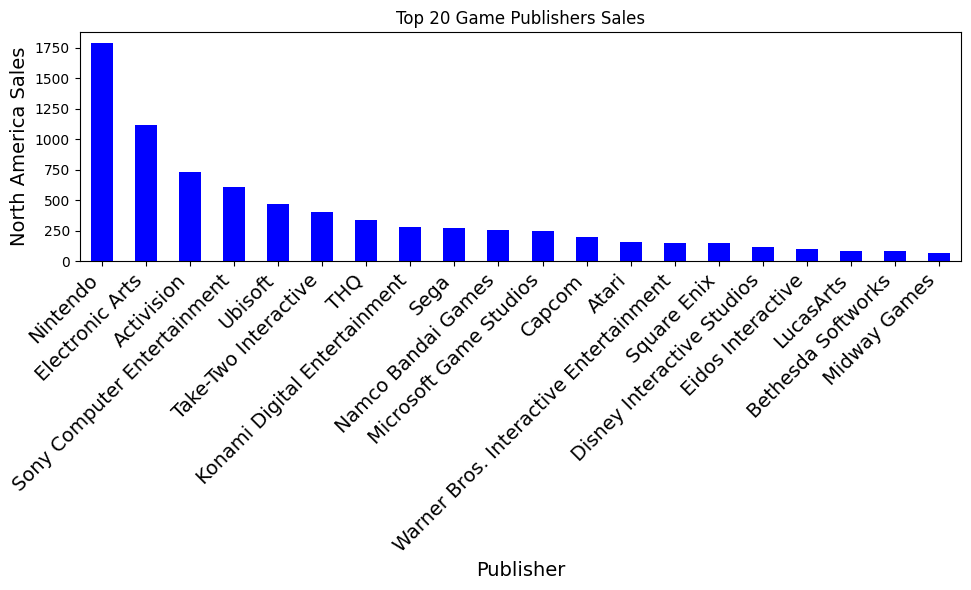

In [ ]:
# Group by Publisher and sum the sales
publisher_salesna = df.groupby('publisher')['na_sales'].sum().sort_values(ascending=False)

# Select top 20 publishers with the most sales
top_publishersna = publisher_salesna.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='blue')
plt.title('Top 20 Game Publishers Sales')
plt.xlabel('Publisher')
plt.ylabel('North America Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

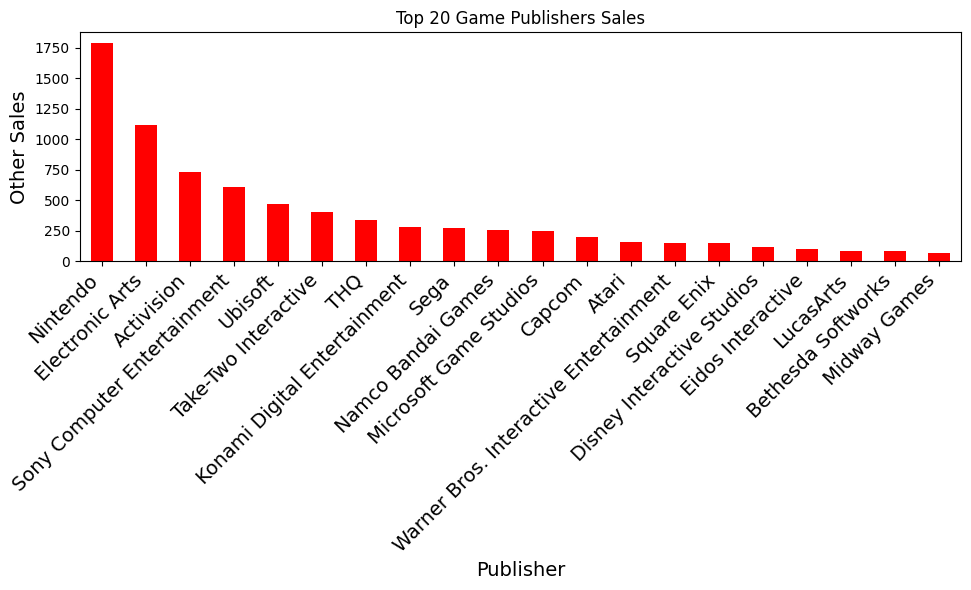

In [ ]:
# Group by Publisher and sum the sales
publisher_saleso = df.groupby('publisher')['other_sales'].sum().sort_values(ascending=False)

# Select top 20 publishers with the most sales
top_publisherso = publisher_saleso.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar', color='red')
plt.title('Top 20 Game Publishers Sales')
plt.xlabel('Publisher')
plt.ylabel('Other Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Developer y Ventas

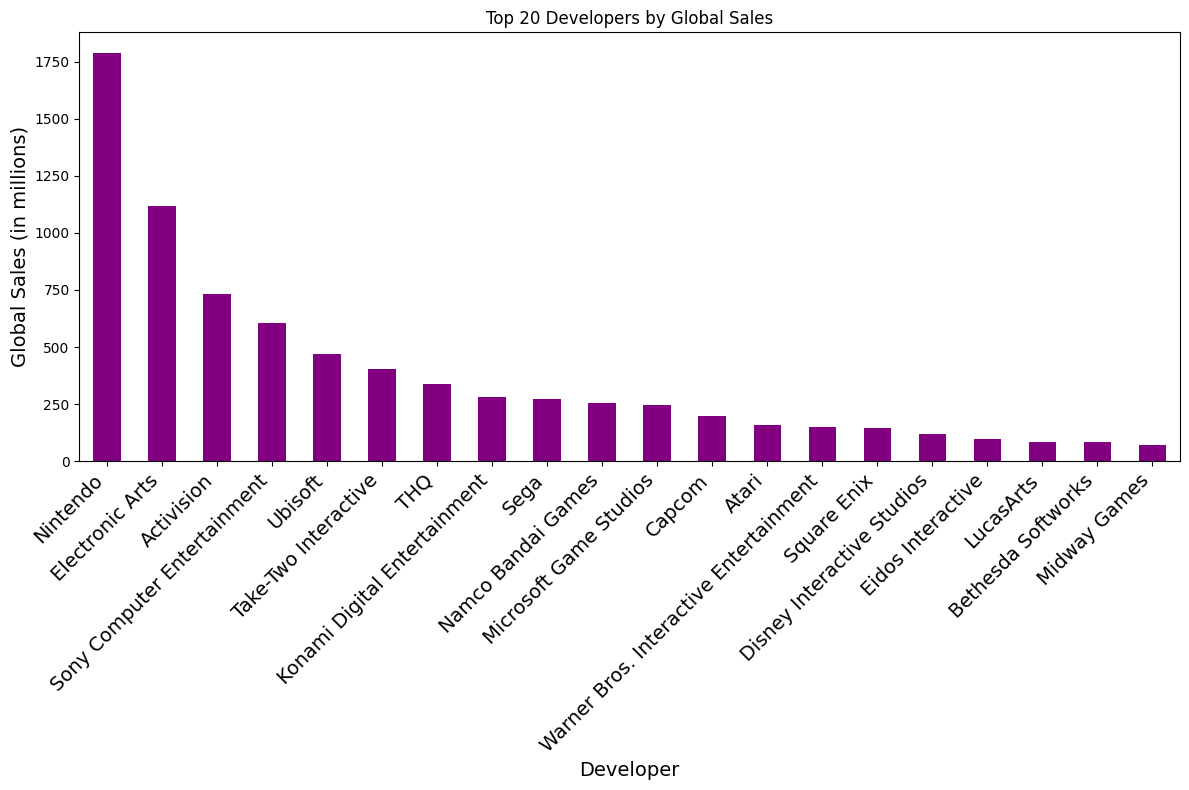

In [ ]:


# Aggregate sales data by publisher
developer_sales = df.groupby('developer')['global_sales'].sum()

# Select the top 20 publishers based on sales
top_developers = developer_sales.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_publishers.plot(kind='bar', color='purple')

# Add labels and title
plt.xlabel('Developer')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 20 Developers by Global Sales')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


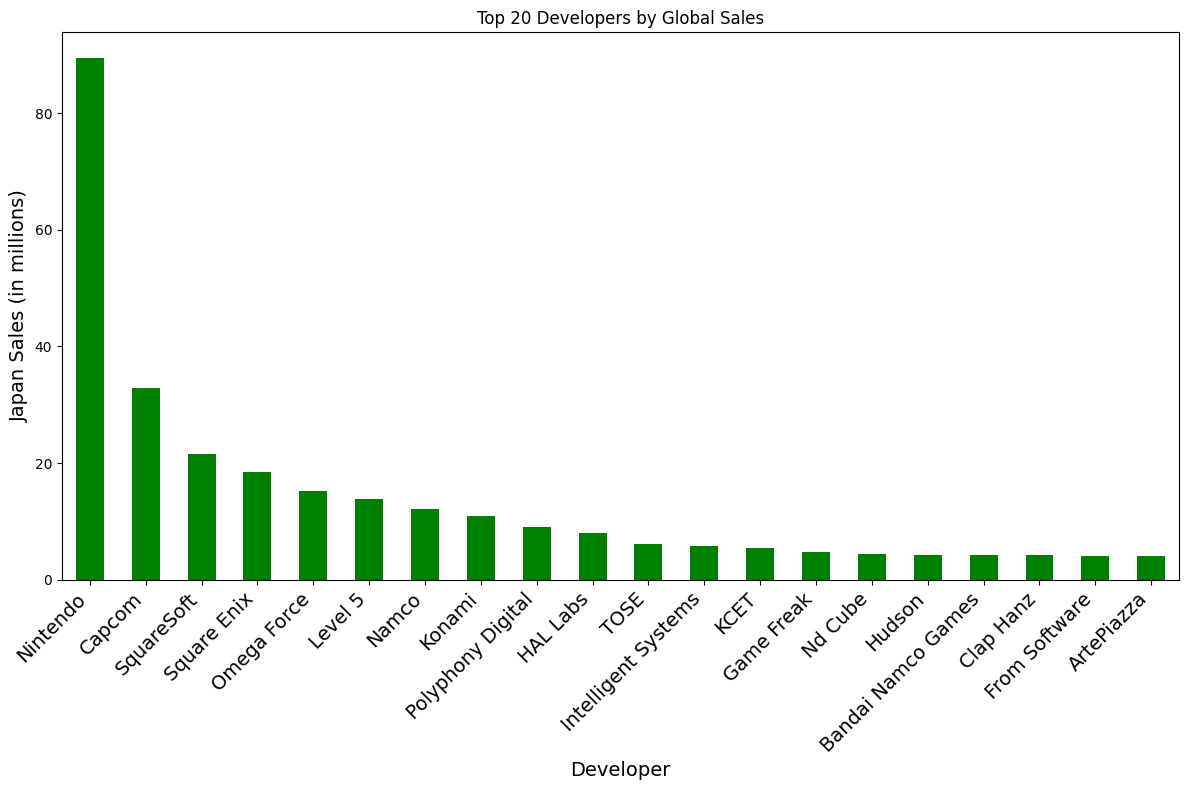

In [ ]:


# Aggregate sales data by publisher
developer_salesjp = df.groupby('developer')['jp_sales'].sum()

# Select the top 20 publishers based on sales
top_developersjp = developer_salesjp.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_developersjp.plot(kind='bar', color='green')

# Add labels and title
plt.xlabel('Developer')
plt.ylabel('Japan Sales (in millions)')
plt.title('Top 20 Developers by Global Sales')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


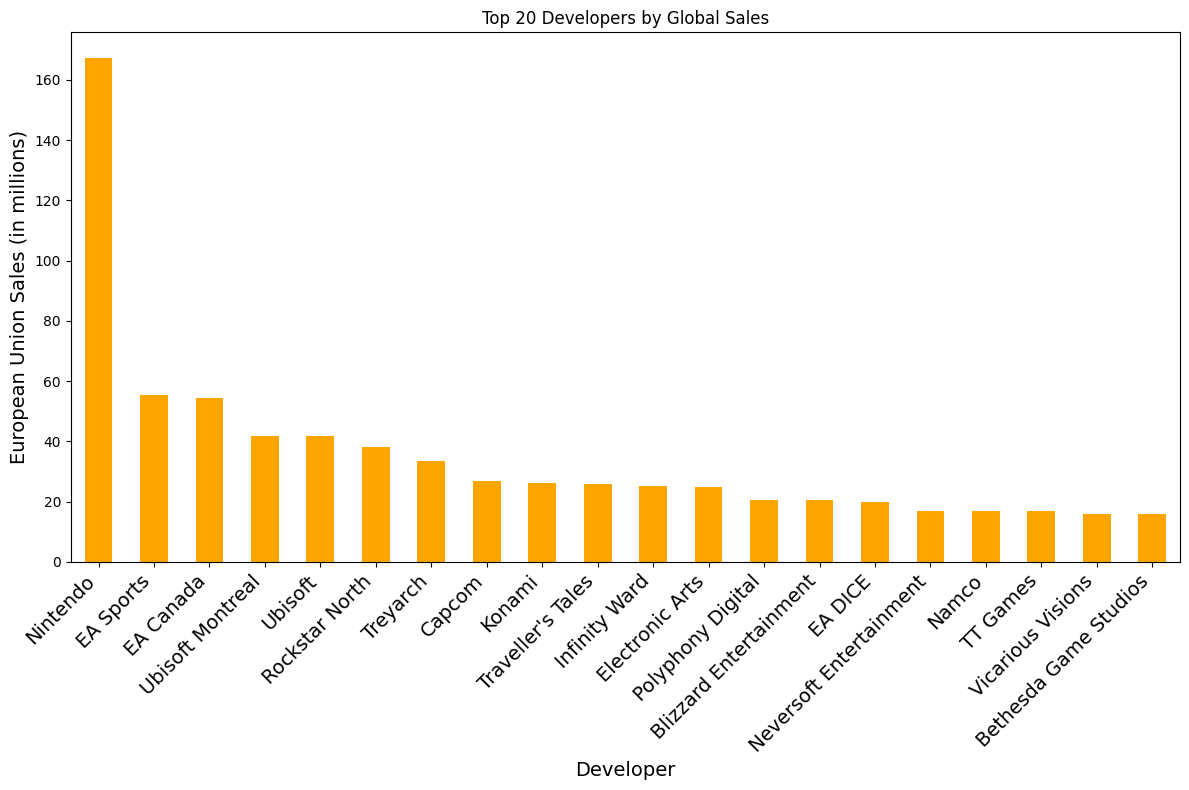

In [ ]:
# Aggregate sales data by publisher
developer_saleseu = df.groupby('developer')['eu_sales'].sum()

# Select the top 20 publishers based on sales
top_developerseu = developer_saleseu.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_developerseu.plot(kind='bar', color='orange')

# Add labels and title
plt.xlabel('Developer')
plt.ylabel('European Union Sales (in millions)')
plt.title('Top 20 Developers by Global Sales')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

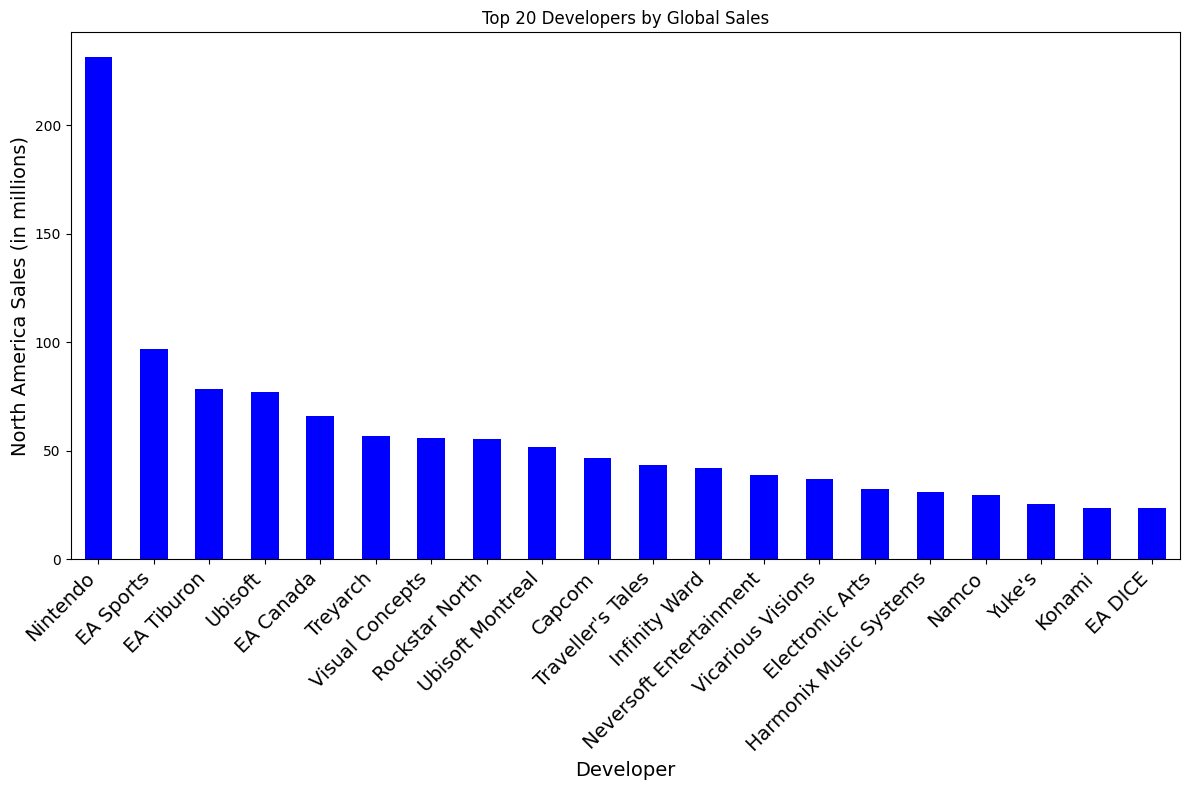

In [ ]:
# Aggregate sales data by publisher
developer_salesna = df.groupby('developer')['na_sales'].sum()

# Select the top 20 publishers based on sales
top_developersna = developer_salesna.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_developersna.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel('Developer')
plt.ylabel('North America Sales (in millions)')
plt.title('Top 20 Developers by Global Sales')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

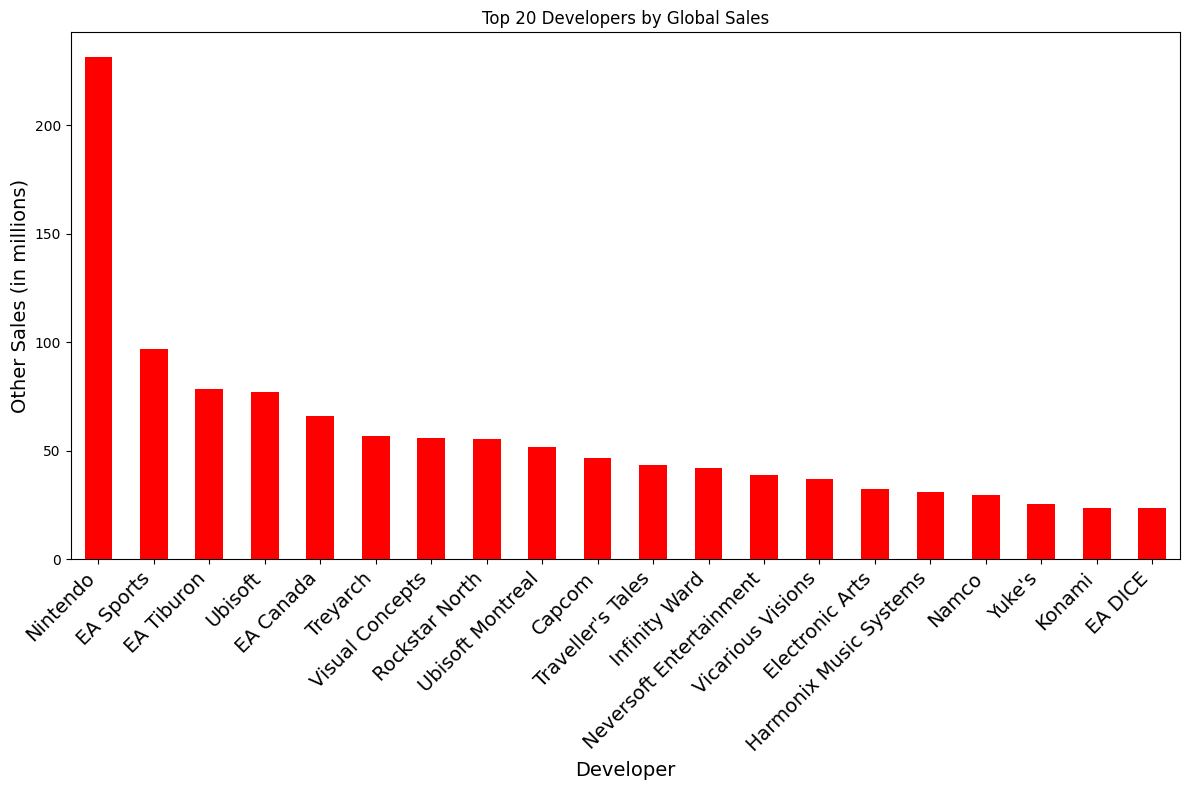

In [ ]:
# Aggregate sales data by publisher
developer_saleso = df.groupby('developer')['other_sales'].sum()

# Select the top 20 publishers based on sales
top_developerso = developer_saleso.nlargest(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_developersna.plot(kind='bar', color='red')

# Add labels and title
plt.xlabel('Developer')
plt.ylabel('Other Sales (in millions)')
plt.title('Top 20 Developers by Global Sales')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

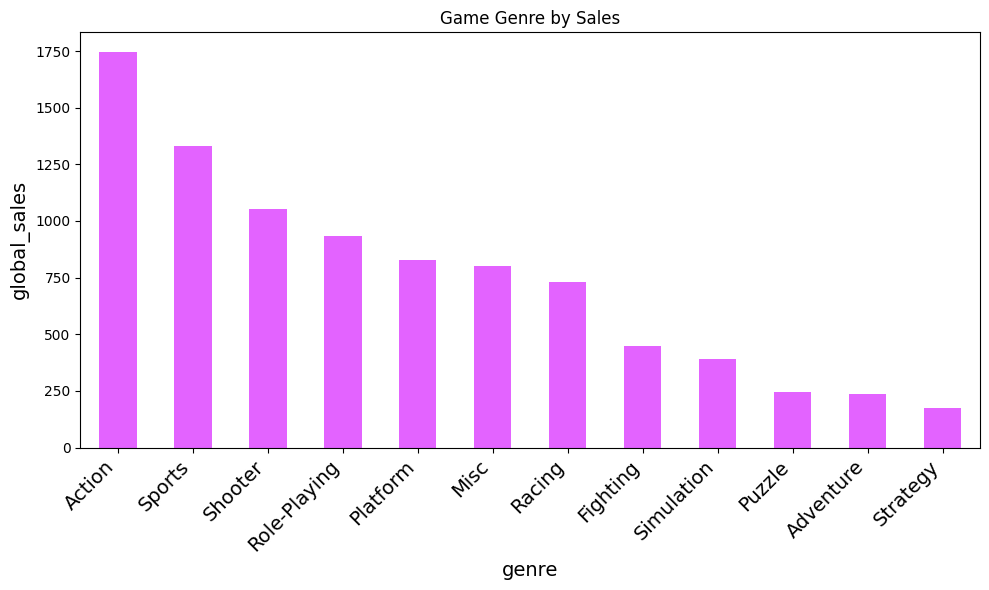

In [ ]:

genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)


top_genres = genre_sales.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='#E363FF')
plt.title('Game Genre by Global Sales')
plt.xlabel('genre')
plt.ylabel('global_sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

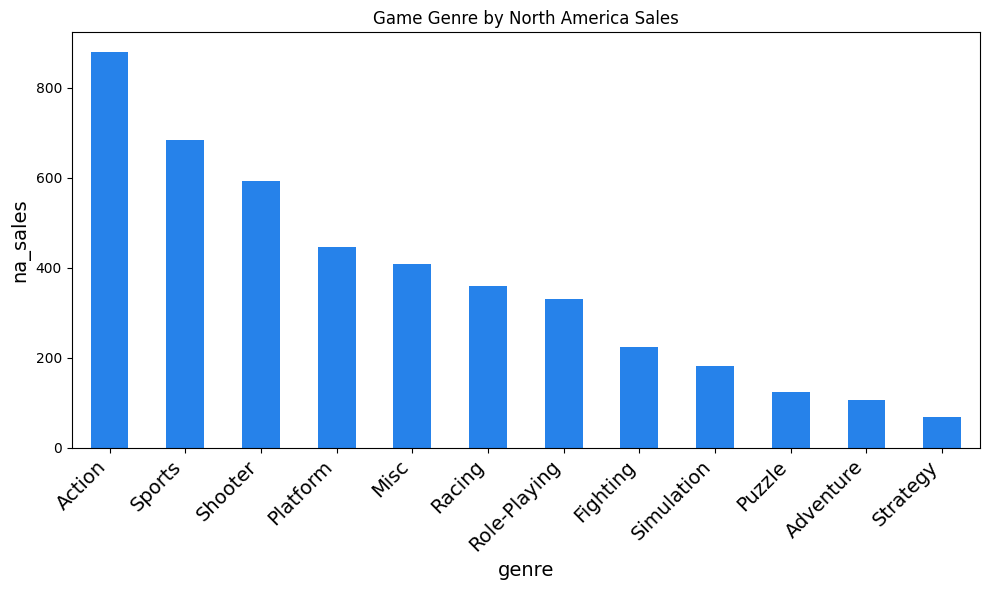

In [ ]:

genre_sales = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)


top_genres = genre_sales.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='#2682EA')
plt.title('Game Genre by North America Sales')
plt.xlabel('genre')
plt.ylabel('na_sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

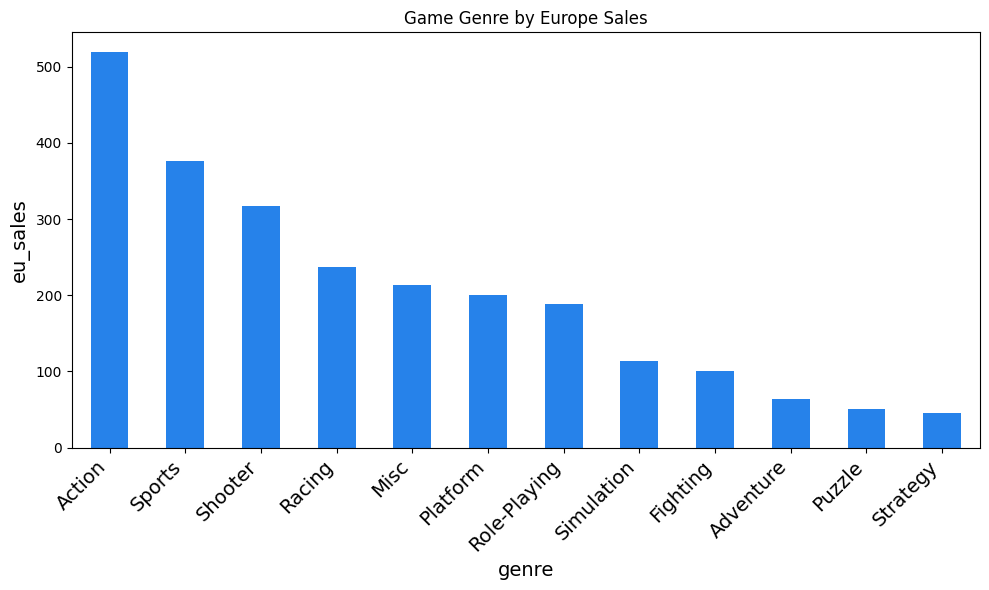

In [ ]:
genre_sales = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)


top_genres = genre_sales.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='#2682EA')
plt.title('Game Genre by Europe Sales')
plt.xlabel('genre')
plt.ylabel('eu_sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

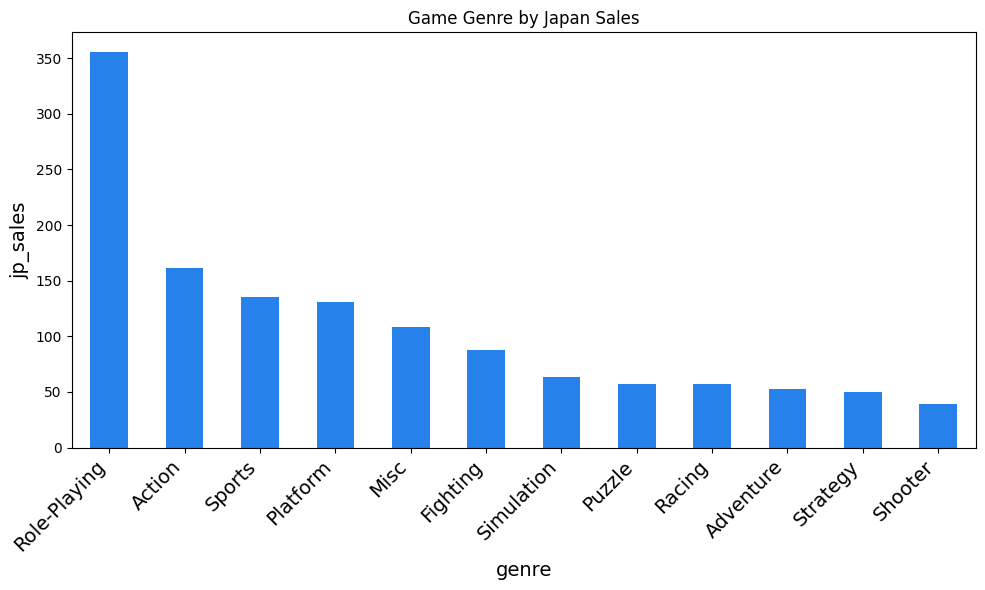

In [ ]:
genre_sales = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)


top_genres = genre_sales.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='#2682EA')
plt.title('Game Genre by Japan Sales')
plt.xlabel('genre')
plt.ylabel('jp_sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

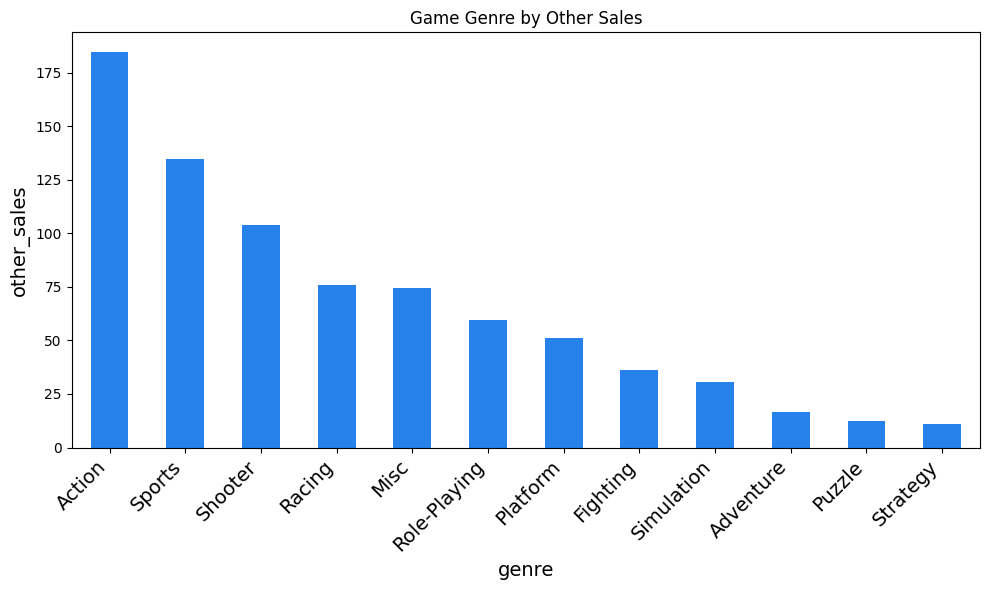

In [ ]:
genre_sales = df.groupby('genre')['other_sales'].sum().sort_values(ascending=False)


top_genres = genre_sales.head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='#2682EA')
plt.title('Game Genre by Other Sales')
plt.xlabel('genre')
plt.ylabel('other_sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

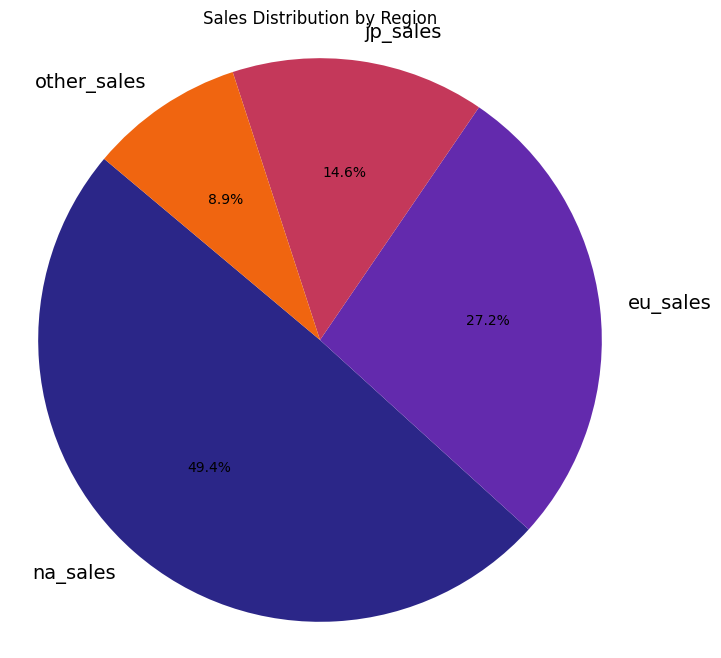

In [ ]:
region_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

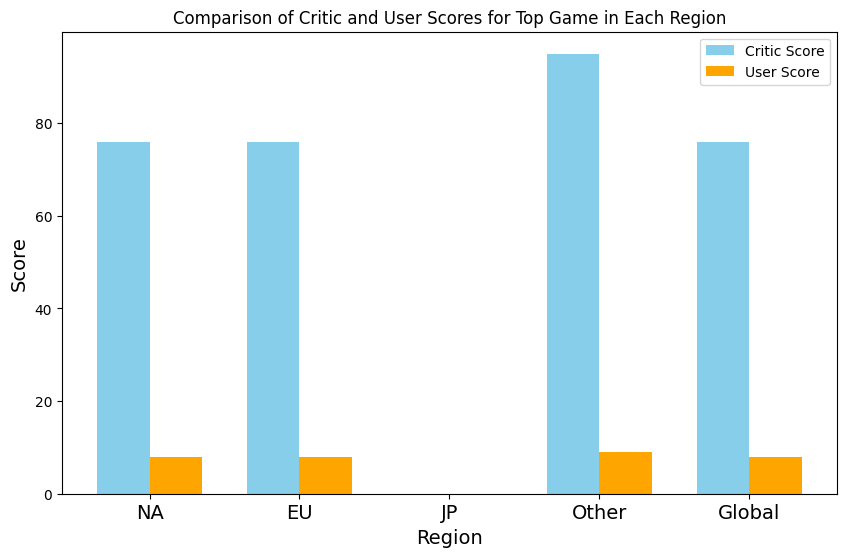

In [ ]:

# Identify the top game for each region based on sales
top_game_na = df.loc[df['na_sales'].idxmax()]
top_game_eu = df.loc[df['eu_sales'].idxmax()]
top_game_jp = df.loc[df['jp_sales'].idxmax()]
top_game_other = df.loc[df['other_sales'].idxmax()]
top_game_global = df.loc[df['global_sales'].idxmax()]

# Create lists of critic scores and user scores for each region's top game
critic_scores = [top_game_na['critic_score'], top_game_eu['critic_score'], top_game_jp['critic_score'], top_game_other['critic_score'], top_game_global['critic_score']]
user_scores = [top_game_na['user_score'], top_game_eu['user_score'], top_game_jp['user_score'], top_game_other['user_score'], top_game_global['user_score']]

# Create a bar chart
regions = ['NA', 'EU', 'JP', 'Other', 'Global']
bar_width = 0.35
index = range(len(regions))

plt.figure(figsize=(10, 6))
plt.bar(index, critic_scores, bar_width, label='Critic Score', color='skyblue')
plt.bar([i + bar_width for i in index], user_scores, bar_width, label='User Score', color='orange')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Score')
plt.title('Comparison of Critic and User Scores for Top Game in Each Region')
plt.xticks([i + bar_width / 2 for i in index], regions)
plt.legend()
plt.show()


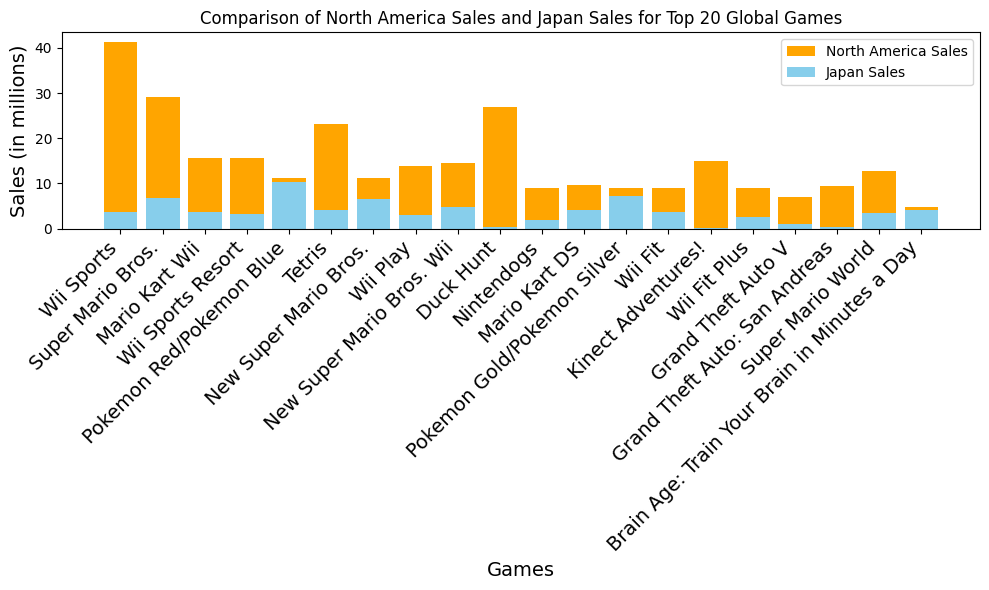

In [ ]:

# Select the top 20 games based on global sales
top_20_global_sales = df.nlargest(20, 'global_sales')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_global_sales['name'], top_20_global_sales['na_sales'], color='orange', label='North America Sales')
plt.bar(top_20_global_sales['name'], top_20_global_sales['jp_sales'], color='skyblue', label='Japan Sales')
plt.title('Comparison of North America Sales and Japan Sales for Top 20 Global Games')
plt.xlabel('Games')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()



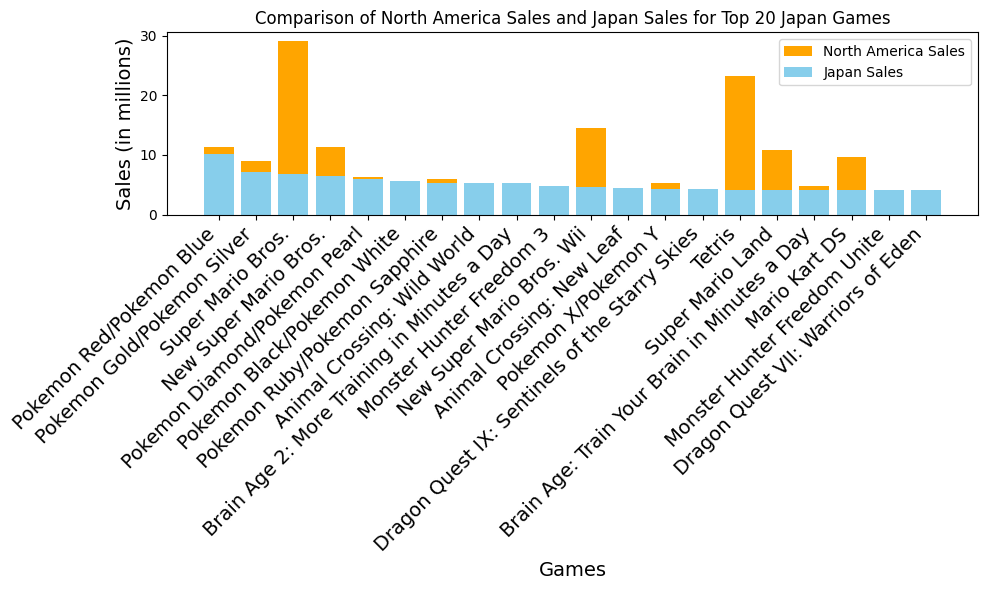

In [ ]:

# Select the top 20 games based on global sales
top_20_jp_sales = df.nlargest(20, 'jp_sales')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_jp_sales['name'], top_20_jp_sales['na_sales'], color='orange', label='North America Sales')
plt.bar(top_20_jp_sales['name'], top_20_jp_sales['jp_sales'], color='skyblue', label='Japan Sales')
plt.title('Comparison of North America Sales and Japan Sales for Top 20 Japan Games')
plt.xlabel('Games')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()



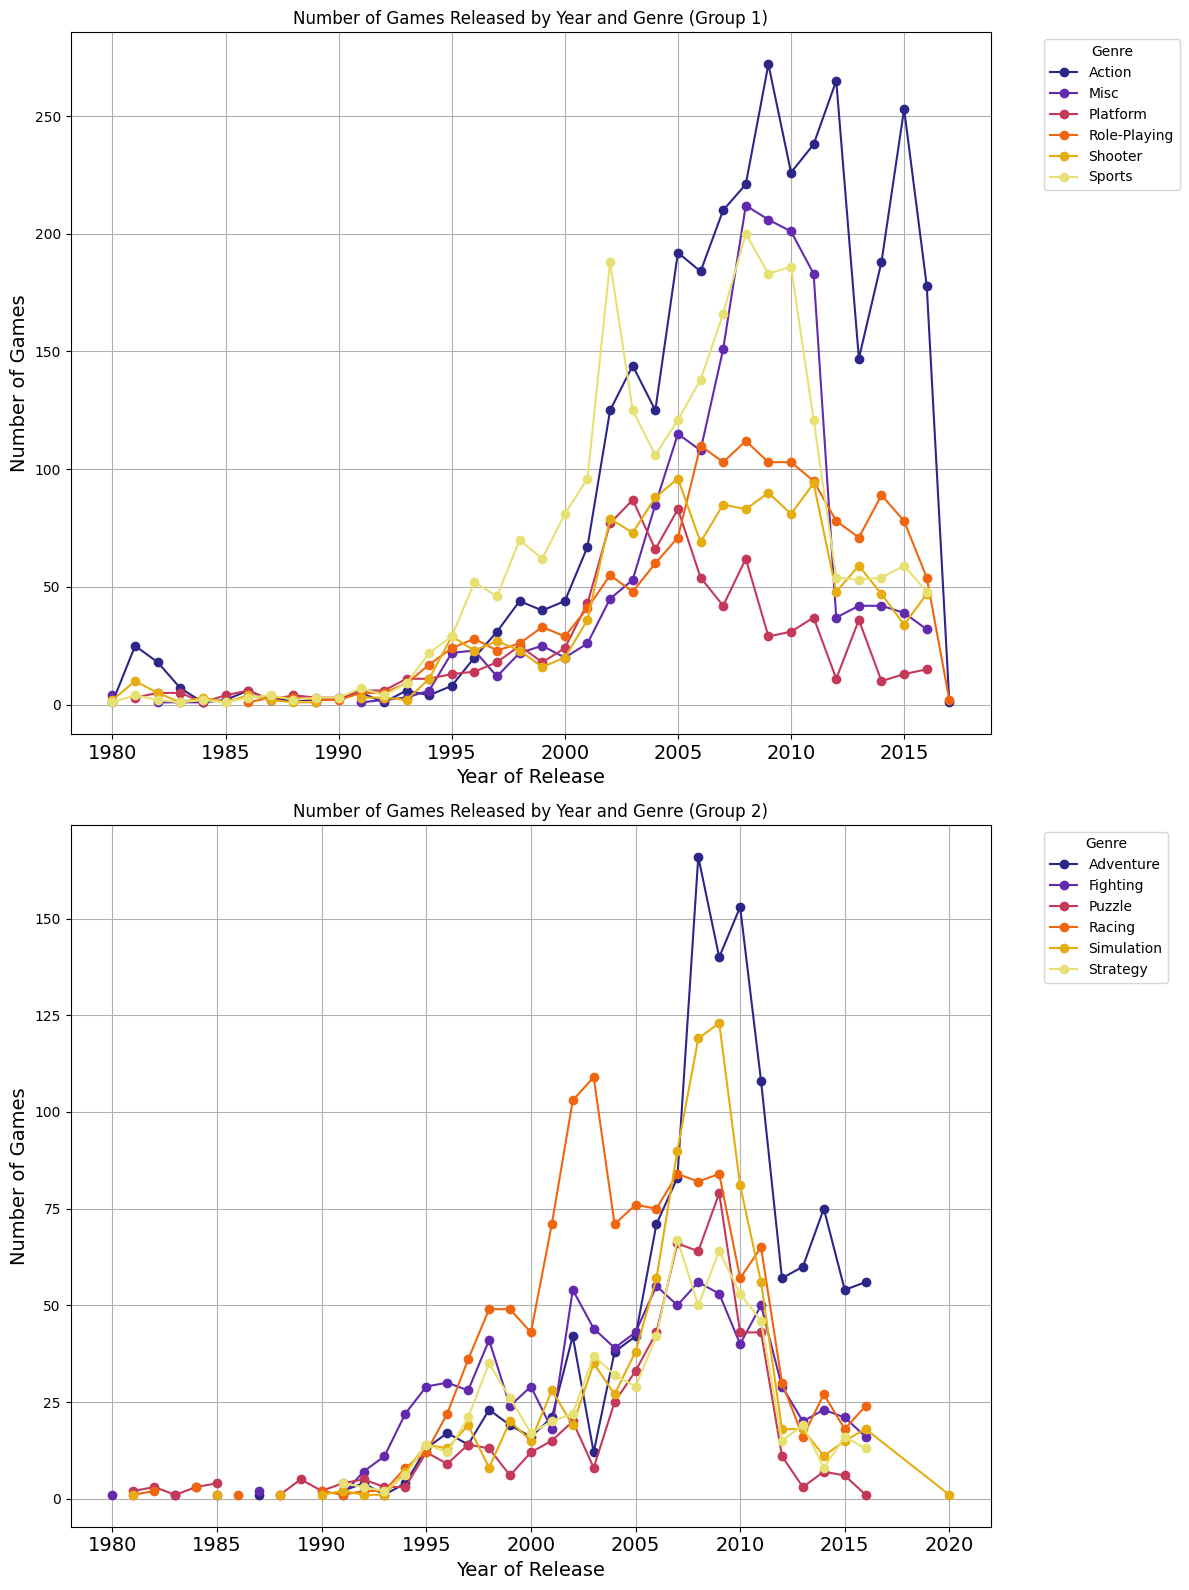

In [ ]:
# Group by year of release and genre, and count the number of games in each group
genre_counts = df.groupby(['year_of_release', 'genre']).size().reset_index(name='counts')

# Split the genres into two groups
genres_group1 = ['Action', 'Sports', 'Shooter', 'Role-Playing','Platform', 'Misc']
genres_group2 = ['Racing', 'Fighting', 'Simulation', 'Puzzle', 'Adventure', 'Strategy']

# Filter genre_counts DataFrame for each group of genres
genre_counts_group1 = genre_counts[genre_counts['genre'].isin(genres_group1)]
genre_counts_group2 = genre_counts[genre_counts['genre'].isin(genres_group2)]

# Pivot the tables to have years as index and genres as columns
pivot_table_group1 = genre_counts_group1.pivot(index='year_of_release', columns='genre', values='counts')
pivot_table_group2 = genre_counts_group2.pivot(index='year_of_release', columns='genre', values='counts')

# Plot the charts for each group of genres
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 16))

pivot_table_group1.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_title('Number of Games Released by Year and Genre (Group 1)')
axes[0].set_xlabel('Year of Release')
axes[0].set_ylabel('Number of Games')
axes[0].legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True)

pivot_table_group2.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_title('Number of Games Released by Year and Genre (Group 2)')
axes[1].set_xlabel('Year of Release')
axes[1].set_ylabel('Number of Games')
axes[1].legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True)

plt.tight_layout()
plt.show()